# Topic Modeling on News Articles

Topic Modelling to segregate news report data to different topics using Gensim, NLTK, Spacy.

Topic modelling as the name suggests, it is a process to automatically identify topics present in a text object and to derive hidden patterns exhibited by a text corpus.

Topics can be defined as “a repeating pattern of co-occurring terms in a corpus”. A good topic model should result in <li>– “health”, “doctor”, “patient”, “hospital” for a topic – Healthcare, <li>and “farm”, “crops”, “wheat” for a topic – “Farming”. 

We have a dataset which consists of **News articles** and our task is to assign topics to those articles.
    
We will do a simple LSI and a LDA method to figure out the topics

Task consist of :

<lu> **1. Loading the data**
    
<lu> **2. Clean the Data**
Transforming text into something an algorithm can digest it a complicated process. We cannot feed the data as it is, some preprocessing needs to be done. In this task we will be doing some preprocessing to convert our data in a form that we can feed our model with.
    
<li> **. Handling the Stop-words**
    
Text may contain stop words like ‘the’, ‘is’, ‘are’. Stop words can be filtered from the text to be processed. There is no universal list of stop words in nlp research, however the nltk module contains a list of stop words. We will remove these stopwords in this task.
    
<li> **. Lemmatization**
    
<lu> **3. TF-IDF Vectorization**
    
Apart from Count vectorizer an alternative to calculate word frequencies , and by far the most popular method is called TF-IDF. This is an acronym than stands for “Term Frequency – Inverse Document” Frequency which are the components of the resulting scores assigned to each word.
    
   
<lu> **4. Topic Modelling using Gensim's LDA**
    
LDA is used to classify text in a document to a particular topic. It builds a topic per document model and words per topic model, modeled as Dirichlet distributions. 

* Each document is modeled as a multinomial distribution of topics and each topic is modeled as a multinomial distribution of words.
* LDA assumes that the every chunk of text we feed into it will contain words that are somehow related. Therefore choosing the right corpus of data is crucial. 
* It also assumes documents are produced from a mixture of topics. Those topics then generate words based on their probability distribution. 
    
<lu> **4. Topic modelling using LSA**
    
Latent Semantic Analysis, or LSA, is one of the foundational techniques in topic modeling. The core idea is to take a matrix of what we have — documents and terms — and decompose it into a separate document-topic matrix and a topic-term matrix.

# Loading the data

In [1]:
#imports
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from string import punctuation
from nltk.tokenize import word_tokenize
from collections import Counter
import operator
import numpy as np




In [2]:
import warnings
warnings.filterwarnings('ignore')  # Let's not pay heed to them right now"

In [3]:
from sklearn.datasets import fetch_20newsgroups
# Dictionary with 'data' as key and each review as an element of list
dataset = fetch_20newsgroups(shuffle=True, random_state=1, remove=('headers', 'footers', 'quotes'))
dataset

{'data': ["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n",
  "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a l

In [4]:
# list of articles
documents = dataset.data

In [5]:
documents

["Well i'm not sure about the story nad it did seem biased. What\nI disagree with is your statement that the U.S. Media is out to\nruin Israels reputation. That is rediculous. The U.S. media is\nthe most pro-israeli media in the world. Having lived in Europe\nI realize that incidences such as the one described in the\nletter have occured. The U.S. media as a whole seem to try to\nignore them. The U.S. is subsidizing Israels existance and the\nEuropeans are not (at least not to the same degree). So I think\nthat might be a reason they report more clearly on the\natrocities.\n\tWhat is a shame is that in Austria, daily reports of\nthe inhuman acts commited by Israeli soldiers and the blessing\nreceived from the Government makes some of the Holocaust guilt\ngo away. After all, look how the Jews are treating other races\nwhen they got power. It is unfortunate.\n",
 "\n\n\n\n\n\n\nYeah, do you expect people to read the FAQ, etc. and actually accept hard\natheism?  No, you need a little leap

In [6]:
# Dataframe with a column `document` containing all the articles
news_df = pd.DataFrame({'document':documents})

In [7]:
news_df

document
0      Well i'm not sure about the story nad it did s...
1      \n\n\n\n\n\n\nYeah, do you expect people to re...
2      Although I realize that principle is not one o...
3      Notwithstanding all the legitimate fuss about ...
4      Well, I will have to change the scoring on my ...
...                                                  ...
11309  Danny Rubenstein, an Israeli journalist, will ...
11310                                                 \n
11311  \nI agree.  Home runs off Clemens are always m...
11312  I used HP DeskJet with Orange Micros Grappler ...
11313                                        ^^^^^^\n...

[11314 rows x 1 columns]

In [8]:
print(news_df.head())

                                            document
0  Well i'm not sure about the story nad it did s...
1  \n\n\n\n\n\n\nYeah, do you expect people to re...
2  Although I realize that principle is not one o...
3  Notwithstanding all the legitimate fuss about ...
4  Well, I will have to change the scoring on my ...


# Clean the Data

Transforming text into something an algorithm can digest it a complicated process. We cannot feed the data 
as it is, some preprocessing needs to be done. 
In this task we will be doing some preprocessing to convert our data in a form that we can feed our model with.'''



In [9]:
news_df = news_df.sample(n = 3000, random_state = 2)#news_df[:1000]
tokenized_doc = news_df['document'].str.replace("[^a-zA-Z#]", " ")
news_df.shape

(3000, 1)

In [10]:
def clean_doc(text):
    #for token in text:
    text =  ' '.join([w.lower() for w in text.split() if len(w)>3])
    return text;

tokenized_doc = tokenized_doc.apply(clean_doc)
tokenized_doc

10720    easy with olivetti quaderno example great subn...
1345     this known journey side united states doppelga...
9751     near majority actually firearms will still cla...
6991     certain apple monitors there been problem with...
1367     thought read that fastmicro having some financ...
                               ...                        
3442     know sounds suspiciously like fault doesn even...
7985                                    telling three call
435      brent feds turned electricity couple weeks per...
2382     were naive teen wrong your homework born last ...
11088    turn driving jews into sick tired this driving...
Name: document, Length: 3000, dtype: object

#### Handling the Stop-words and Punctuation-->Lemmatization

In [11]:
#import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
  
stopwords_set = set(stopwords.words('english'))
custom = list(stopwords_set)+list(punctuation)

def stopWordRemoval(text):
    text = word_tokenize(text)
    text = ' '.join([word for word in text if word not in custom])
    return text

tokenized_doc = tokenized_doc.apply(stopWordRemoval)
tokenized_doc

# Initializing wordnet lemmatizer
lemmatizer = WordNetLemmatizer()

def lemData(text):
    text = word_tokenize(text)
    newText = []
    for word in text:
        newText.append(lemmatizer.lemmatize(word))
    return ' '.join(newText)

doc_clean = tokenized_doc.apply(lemData)
doc_clean


10720    easy olivetti quaderno example great subnotebo...
1345     known journey side united state doppelganger p...
9751     near majority actually firearm still claim vas...
6991     certain apple monitor problem high voltage cap...
1367     thought read fastmicro financial difficulty tr...
                               ...                        
3442     know sound suspiciously like fault even advert...
7985                                    telling three call
435      brent fed turned electricity couple week perha...
2382           naive teen wrong homework born last century
11088    turn driving jew sick tired driving jew sentan...
Name: document, Length: 3000, dtype: object

In [12]:
# Creating a list of documents from the complaints column
list_of_docs = doc_clean.tolist()

# Implementing the function for all the complaints of list_of_docs
doc_clean = [doc.split() for doc in list_of_docs]

In [13]:
doc_clean

[['easy',
  'olivetti',
  'quaderno',
  'example',
  'great',
  'subnotebook',
  'palmtop',
  'sorry',
  'plug',
  'folk',
  'olivetti',
  'seem',
  'good',
  'marketing',
  'includes',
  'sound',
  'digitisation',
  'hardware',
  'provide',
  'vocoders',
  'produce',
  'varous',
  'rate',
  'give',
  'pretty',
  'acceptable',
  'voice',
  'quality',
  'kbit',
  'right',
  'modem',
  'play',
  'record',
  'time',
  'need',
  'play',
  'radio',
  'also',
  'download',
  'code',
  'subunit',
  'though',
  'need',
  'software',
  'development',
  'question',
  'dunno',
  'wanted',
  'produce',
  'vocoder',
  'speed',
  'paul'],
 ['known',
  'journey',
  'side',
  'united',
  'state',
  'doppelganger',
  'produced',
  'great',
  'team',
  'gerry',
  'sylvia',
  'anderson',
  'whose',
  'science',
  'usually',
  'better',
  'first',
  'production',
  'using',
  'live',
  'actor',
  'better',
  'known',
  'technophilic',
  'puppet',
  'show',
  'supercar',
  'stingray',
  'thunderbird',
  'l

## LDA ##



Some of the initialisations necessary for LDA are:
* **id2word** is a mapping from word ids (integers) to words (strings). It is used to determine the vocabulary size, as well as for debugging and topic printing.
* **word2id** is a mapping from words (strings) to word ids (integers). It is used to determine the vocabulary size, as well as for debugging and topic printing.
* **vocab** is a list of words (strings). It is used to determine the various words used in the text, as well as for debugging and topic printing.

In [14]:
import gensim


from gensim import corpora
import string
from gensim.models.ldamodel import LdaModel

# Creating the dictionary id2word from our cleaned word list doc_clean
dictionary = corpora.Dictionary(doc_clean)

# Creating the corpus
doc_term_list = [dictionary.doc2bow(doc) for doc in doc_clean]

# Creating the LDA model
ldamodel = LdaModel(corpus=doc_term_list, num_topics=5,id2word=dictionary, random_state=20)#passes : int, optional  Number of passes through the corpus during training.

In [15]:
help(LdaModel)

Help on class LdaModel in module gensim.models.ldamodel:

class LdaModel(gensim.interfaces.TransformationABC, gensim.models.basemodel.BaseTopicModel)
 |  LdaModel(corpus=None, num_topics=100, id2word=None, distributed=False, chunksize=2000, passes=1, update_every=1, alpha='symmetric', eta=None, decay=0.5, offset=1.0, eval_every=10, iterations=50, gamma_threshold=0.001, minimum_probability=0.01, random_state=None, ns_conf=None, minimum_phi_value=0.01, per_word_topics=False, callbacks=None, dtype=<class 'numpy.float32'>)
 |  
 |  Train and use Online Latent Dirichlet Allocation model as presented in
 |  `'Online Learning for LDA' by Hoffman et al.`_
 |  
 |  Examples
 |  -------
 |  Initialize a model using a Gensim corpus
 |  
 |  .. sourcecode:: pycon
 |  
 |      >>> from gensim.test.utils import common_corpus
 |      >>>
 |      >>> lda = LdaModel(common_corpus, num_topics=10)
 |  
 |  You can then infer topic distributions on new, unseen documents.
 |  
 |  .. sourcecode:: pycon
 | 

In [16]:
from pprint import pprint
# printing the topics
pprint(ldamodel.print_topics())

[(0,
  '0.012*"drive" + 0.007*"would" + 0.006*"system" + 0.006*"disk" + '
  '0.006*"like" + 0.005*"hard" + 0.004*"card" + 0.004*"time" + 0.004*"year" + '
  '0.004*"controller"'),
 (1,
  '0.008*"people" + 0.007*"armenian" + 0.006*"file" + 0.005*"would" + '
  '0.004*"think" + 0.004*"could" + 0.004*"like" + 0.003*"know" + 0.003*"said" '
  '+ 0.003*"even"'),
 (2,
  '0.007*"file" + 0.005*"year" + 0.005*"window" + 0.004*"know" + 0.003*"also" '
  '+ 0.003*"would" + 0.003*"like" + 0.003*"good" + 0.003*"program" + '
  '0.003*"state"'),
 (3,
  '0.011*"would" + 0.006*"people" + 0.005*"know" + 0.005*"like" + '
  '0.004*"right" + 0.004*"time" + 0.004*"well" + 0.003*"think" + 0.003*"thing" '
  '+ 0.003*"need"'),
 (4,
  '0.006*"file" + 0.004*"time" + 0.004*"also" + 0.004*"people" + 0.004*"would" '
  '+ 0.004*"know" + 0.004*"system" + 0.003*"make" + 0.003*"like" + '
  '0.003*"problem"')]


## LDA on TFIDF vectoriser

In [18]:
from gensim import models
# train the model
tfidf = models.TfidfModel(doc_term_list)
corpus_tfidf = tfidf[doc_term_list]

In [19]:
dictionary

In [20]:
# Creating the LDA model
ldamodel = LdaModel(corpus=corpus_tfidf, num_topics=5,id2word=dictionary, random_state=20)

# printing the topics
pprint(ldamodel.print_topics())

[(0,
  '0.001*"drive" + 0.001*"monitor" + 0.001*"people" + 0.001*"alomar" + '
  '0.001*"color" + 0.001*"baerga" + 0.000*"thanks" + 0.000*"time" + '
  '0.000*"disc" + 0.000*"colour"'),
 (1,
  '0.001*"would" + 0.001*"people" + 0.001*"like" + 0.001*"could" + '
  '0.001*"swap" + 0.000*"israel" + 0.000*"much" + 0.000*"think" + 0.000*"said" '
  '+ 0.000*"know"'),
 (2,
  '0.001*"window" + 0.001*"file" + 0.001*"thanks" + 0.001*"know" + '
  '0.001*"drive" + 0.001*"please" + 0.001*"anyone" + 0.001*"deleted" + '
  '0.001*"version" + 0.001*"driver"'),
 (3,
  '0.002*"would" + 0.001*"people" + 0.001*"like" + 0.001*"think" + '
  '0.001*"know" + 0.001*"thing" + 0.001*"problem" + 0.001*"well" + '
  '0.001*"first" + 0.001*"please"'),
 (4,
  '0.001*"would" + 0.001*"like" + 0.001*"time" + 0.001*"people" + 0.001*"know" '
  '+ 0.001*"window" + 0.001*"team" + 0.001*"year" + 0.001*"need" + '
  '0.001*"system"')]


# Evaluation Metric :  topic coherence

#### What is topic coherence?

Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference.

In [21]:
from gensim.models.coherencemodel import CoherenceModel

# Compute Coherence Score
#Topic Coherence measures score a single topic by measuring the degree of semantic similarity between high scoring words in the topic. These measurements help distinguish between topics that are semantically interpretable topics and topics that are artifacts of statistical inference.
coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Coherence Score:  0.3827936504432559


!!!!!!
The coherence_lda value returned by CoherenceModel in Gensim is the average coherence score across all topics in the LDA model. By default, the coherence score is calculated for each individual topic and then averaged across all topics in the model.

One way to measure interpretability is through topic coherence, which is a measure of how semantically coherent the words in a topic are.
Interpreting topic coherence involves examining the coherence score for each topic and comparing it to the coherence scores for other topics in the corpus. Topics with higher coherence scores are more semantically coherent and easier to interpret, while topics with lower coherence scores may be more difficult to interpret or may represent noisy or irrelevant information.

In [22]:
# calculate topic coherence for each topic
coherence_model_lda = CoherenceModel(model=ldamodel, texts=doc_clean, dictionary=dictionary, coherence='c_v', topn=10)
coherence_per_topic = coherence_model_lda.get_coherence_per_topic()

# print the coherence score for each topic
for topic_idx, coherence_score in enumerate(coherence_per_topic):
    print(f'Topic {topic_idx}: Coherence Score = {coherence_score:.3f}')

Topic 0: Coherence Score = 0.335
Topic 1: Coherence Score = 0.473
Topic 2: Coherence Score = 0.374
Topic 3: Coherence Score = 0.527
Topic 4: Coherence Score = 0.362


## Best K topics

Let’s now define a function to compute the topic coherence for a given num_topics value and apply it to the num_topics values used in Latent Semantic Indexing in Python

The last step is to find the optimal number of topics
We need to build many LDA models with different values of the number of topics (k) and pick the one that gives the highest coherence value.



In [23]:
def compute_coherence_values(dictionary, corpus, texts, limit, step, start=2):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model=LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [24]:
#To DO 
#plot coherence distribution and choose best k
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=doc_term_list, texts=doc_clean, start=2, limit=10, step=1)


In [25]:
coherence_values

[0.3838238571928193,
 0.3238038337635994,
 0.3516831707619309,
 0.3457053846339605,
 0.3513205438889755,
 0.3087197803959753,
 0.3421809595720685,
 0.4015082110340119]

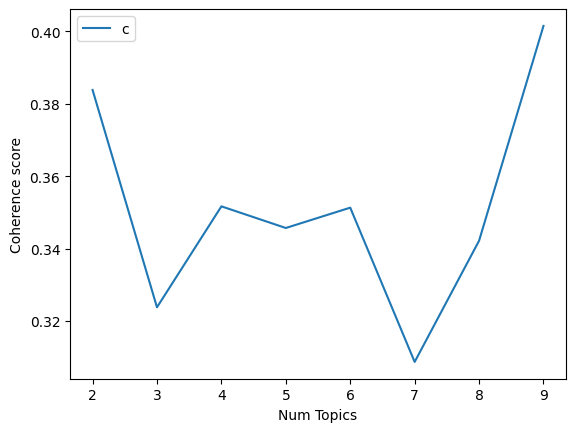

In [27]:
# Show graph
import matplotlib.pyplot as plt
limit=10; start=2; step=1
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

<li> Choosing a ‘k’ that marks the end of a rapid growth of topic coherence usually offers meaningful and interpretable topics. Picking an even higher value can sometimes provide more granular sub-topics. 

<li>If you see the same keywords being repeated in multiple topics, it’s probably a sign that the ‘k’ is too large.

The above plot shows that coherence score increases with the number of topics, with a decline between 3 to 4.

Now, choosing the number of topics still depends on your requirement because topic around 5 have good coherence scores but may have repeated keywords in the topic. Topic coherence gives you a good picture so that you can take better decision.

# pyLDAvis Visualization

pyLDAvis is designed to help users interpret the topics in a topic model that has been fit to a corpus of text data. The package extracts information from a fitted LDA topic model to inform an interactive web-based visualization.

In [29]:
#!pip install pyLDAvis.gensim


import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()#enable automatic D3 display of prepared model data in the IPython notebook.

vis = gensimvis.prepare(ldamodel, doc_term_list, dictionary)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3      0.037842  0.001985       1        1  57.800519
2     -0.005394 -0.029777       2        1  18.621853
4     -0.002055  0.013728       3        1  16.624375
1     -0.012497  0.008179       4        1   4.709298
0     -0.017895  0.005886       5        1   2.243955, topic_info=         Term        Freq       Total Category  logprob  loglift
257     drive  130.000000  130.000000  Default  30.0000  30.0000
449    people  263.000000  263.000000  Default  29.0000  29.0000
375    thanks  192.000000  192.000000  Default  28.0000  28.0000
220   monitor   66.000000   66.000000  Default  27.0000  27.0000
1421    color   80.000000   80.000000  Default  26.0000  26.0000
...       ...         ...         ...      ...      ...      ...
276    please    2.181097  196.203926   Topic5  -7.8879  -0.7024
57      first    2.134264  165.210863   Topic5  -7.9096  -0.5522
332     thing    2.123962  184.373008   Topic5  -7.9145  -0.6667
209     would    2.240802  350.326016   Topic5  -7.8609  -1.2551
409     could    2.106685  175.833103   Topic5  -7.9227  -0.6275

[389 rows x 6 columns], token_table=       Topic      Freq     Term
term                           
366        1  0.475795  advance
366        2  0.373839  advance
366        3  0.084963  advance
366        4  0.033985  advance
366        5  0.033985  advance
...      ...       ...      ...
20759      2  0.766079     zeos
20759      3  0.058929     zeos
12677      1  0.204526     zinc
12677      2  0.681754     zinc
12677      3  0.068175     zinc

[1194 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 5, 2, 1])

 ## How to predict the topics for a new piece of text?

In [30]:
newsgroups_test = fetch_20newsgroups(subset='test', shuffle = True, random_state=1, remove=('headers', 'footers', 'quotes'))
num = 100
unseen_document = newsgroups_test.data[num]
print(unseen_document)

C:\Users\tNouali\AppData\Roaming\Python\Python311\site-packages\sklearn\datasets\_base.py:424: DeprecationWarning: read_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  fdescr = resources.read_text(descr_module, descr_file_name)
c:\Program Files\Python311\Lib\importlib\resources\_legacy.py:80: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  with open_text(package, resource, encoding, errors) as fp:


I'm wondering if I can tote my American touch tone phone around with me
to Sweden and Germany.  It's DC powered, and I can buy a special adapter
for that in Europe.  The question is if the general electronics work
the same.  I can buy a different wall plug and refit it (I'm sure I'd
have to), but would that do the trick?


Assuming that you have already built the topic model, you need to take the text through the same routine of transformations and before predicting the topic.

For our case, the order of transformations is:

sent_to_words() –> lemmatization() –> vectorizer.transform() –> best_lda_model.transform()

You need to apply these transformations in the same order. So to simplify it, let’s combine these steps into a preprocess() function.

In [31]:
# Define function to predict topic for a given text document.


def preprocess(text):
    
    # Step 1: Clean with simple_preprocess
    mytext_2 =  text.replace("[^a-zA-Z#]", " ")
    mytext_3=clean_doc(mytext_2)
    mytext_4=stopWordRemoval(mytext_3)


    # Step 2: Lemmatize
    mytext_5 = lemData(mytext_4)
    
    # Step 3: Vectorize transform
    mytext_6 = dictionary.doc2bow(mytext_5.split())#tfidf.transform(mytext_3)

    
    return mytext_6

# Predict the topic

#topic, prob_scores = predict_topic(text = unseen_document)
#print(topic)

In [ ]:
preprocess(unseen_document)

c:\users\inpt\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(23, 1),
 (29, 1),
 (95, 1),
 (101, 1),
 (209, 1),
 (237, 1),
 (240, 1),
 (253, 1),
 (323, 1),
 (504, 1),
 (626, 1),
 (781, 1),
 (1185, 1),
 (1960, 1),
 (2244, 1),
 (2378, 1),
 (2509, 1),
 (4133, 1),
 (5021, 1),
 (5417, 1),
 (5688, 1),
 (8608, 1)]

In [32]:
#  predicting new text 
ldamodel[preprocess(unseen_document)]

[(1, 0.058194384), (3, 0.9150978)]

In [ ]:
for index, score in sorted(ldamodel[new_text_corpus], key=lambda tup: -1*tup[1]):
    print("Score: {}\t Topic: {}".format(score, ldamodel.print_topic(index, 5)))

Score: 0.8307881951332092	 Topic: 0.005*"know" + 0.004*"time" + 0.003*"also" + 0.003*"problem" + 0.003*"people"
Score: 0.14143070578575134	 Topic: 0.004*"know" + 0.004*"people" + 0.004*"right" + 0.003*"would" + 0.003*"well"


c:\users\inpt\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Gensim LSI 

In [33]:
from gensim.models.lsimodel import LsiModel

In [34]:
# Creating the LSi model
lsimodel = LsiModel(corpus=doc_term_list, num_topics=5, id2word=dictionary)
pprint(lsimodel.print_topics())

C:\Users\tNouali\AppData\Roaming\Python\Python311\site-packages\gensim\models\lsimodel.py:963: DeprecationWarning: Please use `csc_matvecs` from the `scipy.sparse` namespace, the `scipy.sparse.sparsetools` namespace is deprecated.
  sparsetools.csc_matvecs(


[(0,
  '-0.554*"file" + -0.186*"image" + -0.154*"data" + -0.151*"system" + '
  '-0.115*"graphic" + -0.115*"also" + -0.101*"widget" + -0.100*"state" + '
  '-0.097*"user" + -0.095*"mail"'),
 (1,
  '0.600*"file" + -0.223*"image" + -0.167*"data" + 0.150*"firearm" + '
  '-0.145*"system" + 0.137*"congress" + 0.117*"bill" + 0.113*"control" + '
  '-0.111*"drive" + -0.103*"graphic"'),
 (2,
  '0.260*"people" + 0.242*"know" + -0.238*"image" + 0.237*"armenian" + '
  '0.212*"said" + 0.176*"would" + -0.127*"drive" + -0.126*"data" + '
  '-0.125*"system" + -0.124*"graphic"'),
 (3,
  '-0.519*"drive" + -0.346*"disk" + -0.241*"controller" + -0.241*"hard" + '
  '-0.237*"bios" + -0.173*"feature" + -0.172*"system" + -0.165*"support" + '
  '-0.163*"card" + 0.161*"image"'),
 (4,
  '0.443*"widget" + -0.244*"image" + 0.236*"resource" + 0.221*"value" + '
  '0.216*"application" + 0.209*"converter" + 0.172*"visual" + -0.159*"graphic" '
  '+ 0.156*"default" + 0.153*"string"')]


# Word Cloud Visualization

c:\users\inpt\appdata\local\programs\python\python39\lib\site-packages\ipykernel\ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


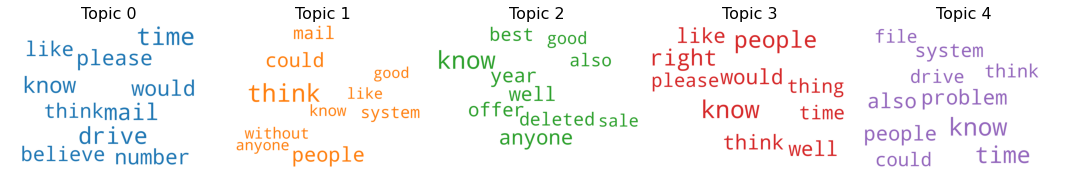

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = ldamodel.show_topics(formatted=False)

fig, axes = plt.subplots(1, 5, figsize=(15,15), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
fig.savefig('word_cloud.png')
plt.show()